<a href="https://colab.research.google.com/github/ParvG2005/Parv/blob/main/LR_Purchase_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from google.colab import files
uploaded = files.upload()

Saving Purchase_Logistic.csv to Purchase_Logistic (3).csv


Confusion matrix:
 [[6 0]
 [0 4]]
Accuracy: 1.00


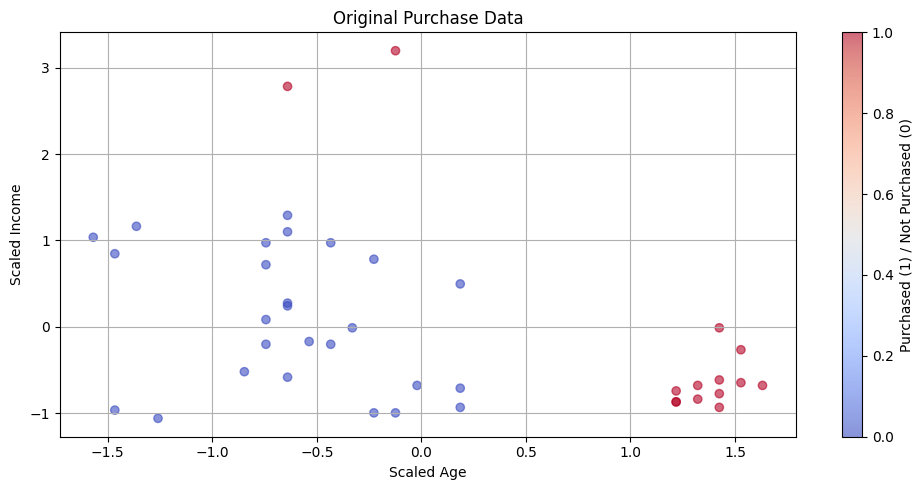

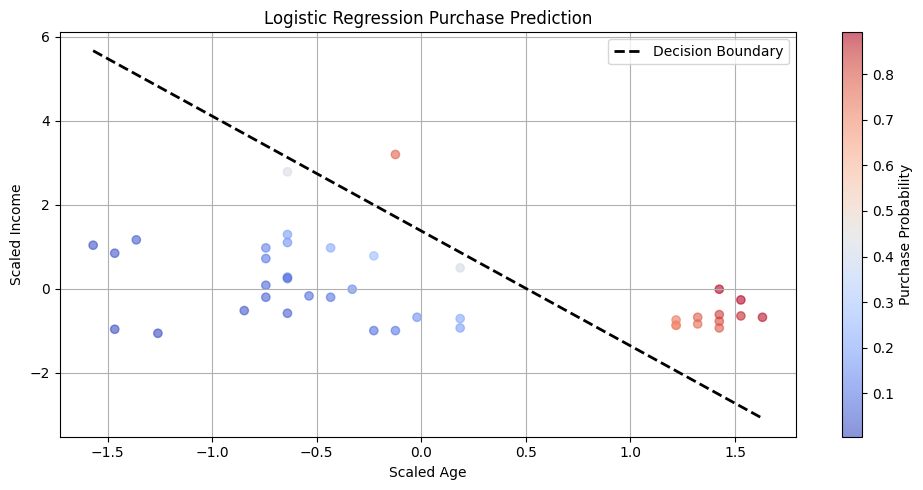

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Load data
purchaseData = pd.read_csv('Purchase_Logistic.csv')
X = purchaseData.iloc[:, [2, 3]].values  # Age and EstimatedSalary
Y = purchaseData.iloc[:, 4].values       # Purchased

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25, random_state=0)

# Train Logistic Regression
logr = LogisticRegression(random_state=0)
logr.fit(Xtrain, Ytrain)
Ypred = logr.predict(Xtest)

# Evaluate
cmat = confusion_matrix(Ytest, Ypred)
accuracy = accuracy_score(Ytest, Ypred)
print('Confusion matrix:\n', cmat)
print(f'Accuracy: {accuracy:.2f}')

# Plot original data
plt.figure(1, figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='coolwarm', alpha=0.6)
plt.title('Original Purchase Data')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Income')
plt.grid(True)
plt.colorbar(label='Purchased (1) / Not Purchased (0)')
plt.tight_layout()

# Plot decision boundary and probabilities
plt.figure(2, figsize=(10, 5))
col = sigmoid(np.dot(X, logr.coef_.T) + logr.intercept_).ravel()
plt.scatter(X[:, 0], X[:, 1], c=col, cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Purchase Probability')

# Decision boundary line
xplot = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
yplot = -(logr.coef_[0, 0]*xplot + logr.intercept_)/logr.coef_[0, 1]
plt.plot(xplot, yplot, 'k--', linewidth=2, label='Decision Boundary')

plt.title('Logistic Regression Purchase Prediction')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Income')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()